In [1]:
# Import libraries
import pandas as pd
import json
from random import shuffle
import numpy as np

In [2]:
# Read in the review dataset
review_path = "yelp_dataset/yelp_academic_dataset_review.json"
f = open(review_path, 'r', encoding = 'utf8')

# Read in the review dataset into a list
review_data = []
for l in f:
    review_data.append(json.loads(f.readline()))

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_dataset/yelp_academic_dataset_review.json'

In [4]:
# Create lists of 1-star and 5-star reviews
one_star_reviews = [r for r in review_data if r['stars'] == 1]
five_star_reviews = [r for r in review_data if r['stars'] == 5]

NameError: name 'review_data' is not defined

In [ ]:
# Shuffle data and take a subset of the randomized data
# Limit to 65000 reviews due to Github file size limits
shuffle(one_star_reviews)
rand_one_star_reviews = one_star_reviews[:65000]
shuffle(five_star_reviews)
rand_five_star_reviews = five_star_reviews[:65000]

In [ ]:
# Create text file containing the review text from one star reviews
file = open("one_star_reviews.txt", "w")
for r in rand_one_star_reviews:
    # append '*STOP*' to split the review text when reading from file
    text = r['text'].strip("\n") + "*STOP*"
    file.write(text)
file.close()

In [ ]:
# Create text file containing the review text from five star reviews
file = open("five_star_reviews.txt", "w")
for r in rand_five_star_reviews:
    # append '*STOP*' to split the review text when reading from file
    text = r['text'].strip("\n") + "*STOP*"
    file.write(text)
file.close()

## One Star Review Text to Pandas DataFrame

In [3]:
# Loading one star review data from managable file size into pandas dataframe

# assigning file path
one_star_path = "one_star_reviews.txt"

# reading file into pandas dataframe and skipping blank lines of text and only using the first column
one_df = pd.read_csv(one_star_path, sep="\n", skipinitialspace=True, usecols=range(0,1), header=None)

# naming column "review"
one_df.columns = ["review"]

# stripping any initial and ending whitespaces from reviews
one_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

one_df.head()

review
0  I sought this out because Yelp caught my eye w...
1  First of all Yelp, it isn't a restaurant that ...
2  I stepped up and had trouble finding the order...
3  I sorted through those waiting, politely asked...
4  Window guy said it would be about 7 mins, whic...

## Five Star Review Text to Pandas DataFrame

In [4]:
# Loading five star review data from managable file size into pandas dataframe

# assigning file path
five_star_path = "five_star_reviews.txt"

# reading file into pandas dataframe and skipping blank lines of text and only using the first column 
five_df = pd.read_csv(one_star_path, sep="\n", skipinitialspace=True, usecols=range(0,1), header=None)

# naming column "review"
five_df.columns = ["review"]

# stripping any initial and ending whitespaces from reviews
five_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

five_df.head()

review
0  I sought this out because Yelp caught my eye w...
1  First of all Yelp, it isn't a restaurant that ...
2  I stepped up and had trouble finding the order...
3  I sorted through those waiting, politely asked...
4  Window guy said it would be about 7 mins, whic...

## Imports for NLTK and TF-IDF

In [5]:
# Imports
%matplotlib inline

import matplotlib.pyplot as plt

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which that transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
# Standard Python has some useful string tools
import string

# Collections is a part of standard Python, with some useful data objects
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenize and counts for One Star Reviews

In [6]:
# reading one star reviews from text file
with open(one_star_path, 'r', encoding = 'utf8') as one_star:
    one_sents = one_star.readlines()


In [7]:
# strip words
one_sents = [words.strip() for words in one_sents]

In [8]:
# intializing token array
tokens = []

# tokenizing words
for x in one_sents:
    tokens.extend(nltk.word_tokenize(x))

print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 10530226
Number of unique words: 	 127049


In [9]:
# removing punctuation from word list
one_counts = Counter(tokens)

for punc in string.punctuation:
    if punc in one_counts:
        one_counts.pop(punc)

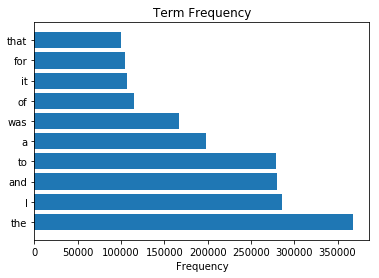

In [10]:
# counting words for term frequency
top10_one = one_counts.most_common(10)

# Extract the top words, and counts
top10_words_one = [it[0] for it in top10_one]
top10_counts_one = [it[1] for it in top10_one]

# Plot a barplot of the most frequent words in the text
plt.barh(top10_words_one, top10_counts_one)
plt.title('Term Frequency');
plt.xlabel('Frequency');

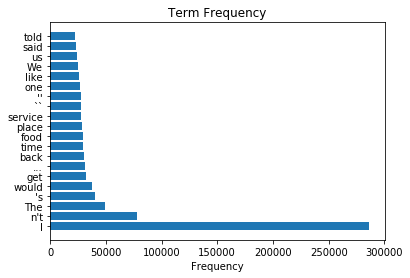

In [11]:
# removing common corpus words from nltk lexicon
for stop in nltk.corpus.stopwords.words('english'):
    if stop in one_counts:
        one_counts.pop(stop)

# Get the top 20 most frequent words, of the stopword-removed data
one_top20 = one_counts.most_common(20)

# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in one_top20], [it[1] for it in one_top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

## TF-IDF for One Star Reviews

In [12]:
# Initialize a TFIDF object
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
tfidf_books = tfidf.fit_transform(one_sents).toarray()


# Don't know why this ERRORs

In [13]:
# Get the IDF weights for the top 10 most common words
IDF_weights_one = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top10_words_one]

# Plot the IDF scores for the very common words
plt.barh(top10_words_one, IDF_weights_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

KeyError: 'I'

# List of Tokens for One Star

In [14]:
tokens

['I',
 'sought',
 'this',
 'out',
 'because',
 'Yelp',
 'caught',
 'my',
 'eye',
 'with',
 'it',
 'being',
 'on',
 'their',
 '``',
 'Best',
 'of',
 'Yelp',
 'Phoenix',
 'Restaurants',
 "''",
 'so',
 'I',
 'made',
 'a',
 'deliberate',
 'drive',
 'to',
 'get',
 'there',
 ',',
 'ate',
 'what',
 'I',
 'though',
 'was',
 'representative',
 'and',
 'think',
 'Yelp',
 'has',
 'this',
 'one',
 'wrong',
 '.',
 'First',
 'of',
 'all',
 'Yelp',
 ',',
 'it',
 'is',
 "n't",
 'a',
 'restaurant',
 'that',
 'you',
 'claim',
 'but',
 'a',
 'food',
 'truck',
 ',',
 'a',
 'very',
 'small',
 'food',
 'truck',
 '.',
 'But',
 'I',
 'had',
 'read',
 'the',
 'Yelp',
 'reviews',
 'and',
 'knew',
 'that',
 '.',
 'I',
 'stepped',
 'up',
 'and',
 'had',
 'trouble',
 'finding',
 'the',
 'ordering',
 'line',
 'through',
 'the',
 'people',
 '.',
 'While',
 'there',
 'was',
 "n't",
 'a',
 'big',
 'group',
 'ordering',
 ',',
 'about',
 '6',
 'people',
 'were',
 'clustered',
 'around',
 'blocking',
 'the',
 'window',
 

## List of top 50 IDF Words for One Star Reviews 
### We should manually pick from this list

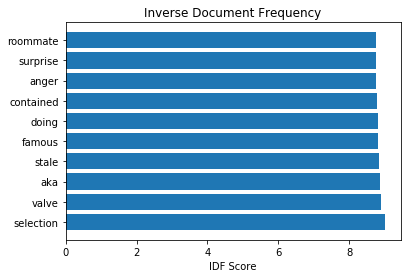

In [15]:
# Get the words with the highest IDF score
one_high_idf = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens_one = [list(tfidf.vocabulary_)[words] for words in one_high_idf]
top_IDF_scores_one = tfidf.idf_[one_high_idf]

# Get the words with the highest IDF score
plt.barh(top_IDF_tokens_one, top_IDF_scores_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

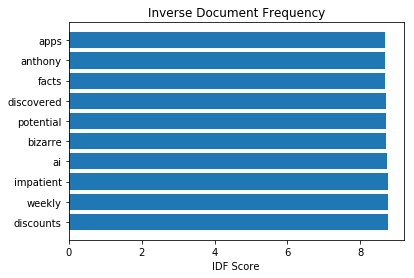

In [16]:
# Get the words with the highest IDF score
one_high_idf = np.argsort(tfidf.idf_)[::-1][10:20]
top_IDF_tokens_one = [list(tfidf.vocabulary_)[words] for words in one_high_idf]
top_IDF_scores_one = tfidf.idf_[one_high_idf]

# Get the words with the highest IDF score
plt.barh(top_IDF_tokens_one, top_IDF_scores_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

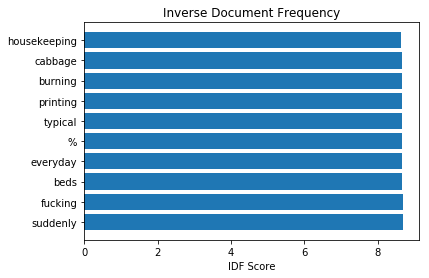

In [17]:
# Get the words with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][20:30]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

# Get the words with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

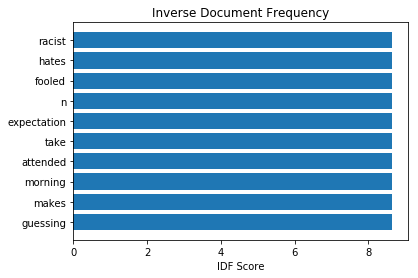

In [18]:
# Get the words with the highest IDF score
one_high_idf = np.argsort(tfidf.idf_)[::-1][30:40]
top_IDF_tokens_one = [list(tfidf.vocabulary_)[words] for words in one_high_idf]
top_IDF_scores_one = tfidf.idf_[one_high_idf]

# Get the words with the highest IDF score
plt.barh(top_IDF_tokens_one, top_IDF_scores_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [19]:
# Get the words with the highest IDF score
one_high_idf = np.argsort(tfidf.idf_)[::-1][40:50]
top_IDF_tokens_one = [list(tfidf.vocabulary_)[words] for words in one_high_idf]
top_IDF_scores_one = tfidf.idf_[one_high_idf]

# Get the words with the highest IDF score
plt.barh(top_IDF_tokens_one, top_IDF_scores_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

## Tokenize and counts for Five Star Reviews

In [20]:
# reading five star reviews from text file
with open(five_star_path, 'r', encoding = 'utf8') as five_file:
    five_sents = five_file.readlines()

In [21]:
# stripping five star reviews
five_sents = [words.strip() for words in five_sents]

In [22]:
# five star token list
five_tokens = []

# adding tokens
for x in five_sents:
    five_tokens.extend(nltk.word_tokenize(x))

print('Number of words in the data: \t', len(five_tokens))
print('Number of unique words: \t', len(set(five_tokens)))

Number of words in the data: 	 6578457
Number of unique words: 	 109305


In [23]:
# counting word list
five_counts = Counter(five_tokens)

# removing punctuation from word list
for punc in string.punctuation:
    if punc in five_counts:
        five_counts.pop(punc)

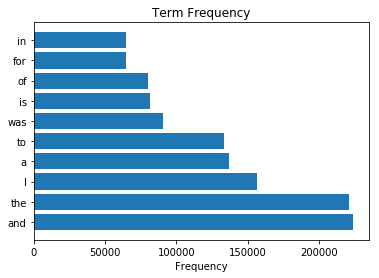

In [24]:
# getting most common words
five_top10 = five_counts.most_common(10)

# Extract the top words, and counts
five_top10_words = [it[0] for it in five_top10]
five_top10_counts = [it[1] for it in five_top10]

# Plot a barplot of the most frequent words in the text
plt.barh(five_top10_words, five_top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

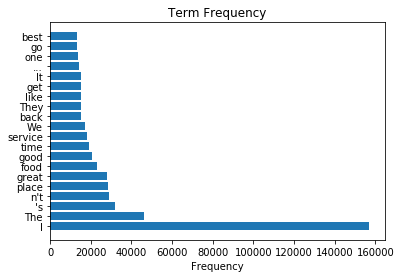

In [25]:
for stop in nltk.corpus.stopwords.words('english'):
    if stop in five_counts:
        five_counts.pop(stop)

# Get the top 20 most frequent words, of the stopword-removed data
five_top20 = five_counts.most_common(20)

# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in five_top20], [it[1] for it in five_top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

## TF-IDF for Five Star Reviews

In [26]:
# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
five_tfidf_books = tfidf.fit_transform(five_sents).toarray()

# Don't know why this ERRORs

In [27]:
# Get the IDF weights for the top 10 most common words
five_IDF_weights = [tfidf.idf_[tfidf.vocabulary_[five_token]] for five_token in five_top10_words]

# Plot the IDF scores for the very common words
plt.barh(five_top10_words, five_IDF_weights)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

KeyError: 'I'

# List of Tokens for Five Star

In [28]:
five_tokens

['For',
 'take',
 'out',
 ',',
 'this',
 'place',
 'is',
 'hard',
 'to',
 'beat',
 '.',
 'Never',
 'had',
 'bad',
 'meal',
 'from',
 'here',
 '.',
 'Owners',
 'very',
 'nice',
 'and',
 'cook',
 'clean',
 'quality',
 'food',
 '.*STOP*Dr',
 '.',
 'Hibner',
 'is',
 'not',
 'only',
 'a',
 'great',
 'physician',
 ',',
 'He',
 'is',
 'a',
 'really',
 'nice',
 'doctor',
 '.',
 'For',
 'someone',
 'for',
 'endometriosis',
 'facing',
 'surgery',
 'and',
 'having',
 'experienced',
 'surgery',
 'at',
 'other',
 'practices',
 ',',
 'I',
 'find',
 'the',
 'care',
 'exceptional',
 '.',
 'I',
 'would',
 'refer',
 'my',
 'friends',
 'and',
 'family',
 'to',
 'his',
 'office',
 'for',
 'pelvic',
 'pain',
 'or',
 'any',
 'other',
 'OB/GYN',
 'issues',
 '.',
 '*STOP*I',
 'love',
 'float',
 '!',
 'Super',
 'clean',
 ',',
 'well',
 'run',
 'by',
 'really',
 'great',
 'people',
 '.',
 'One',
 'really',
 'useful',
 'tool',
 'for',
 'dealing',
 'with',
 'the',
 'stress',
 'of',
 'modern',
 'city',
 'life',
 '

## List of top 50 IDF Words for Five Star Reviews 
### We should manually pick from this list

In [30]:
# Get the top 10 five star words with the highest IDF score
five_inds = np.argsort(tfidf.idf_)[::-1][:10]
five_top_IDF_tokens = [list(tfidf.vocabulary_)[words] for words in five_inds]
five_top_IDF_scores = tfidf.idf_[five_inds]

# Get the words with the highest IDF score
plt.barh(five_top_IDF_tokens, five_top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [31]:
# Get the top 10 five star words with the highest IDF score
five_inds = np.argsort(tfidf.idf_)[::-1][10:20]
five_top_IDF_tokens = [list(tfidf.vocabulary_)[words] for words in five_inds]
five_top_IDF_scores = tfidf.idf_[five_inds]

# Get the words with the highest IDF score
plt.barh(five_top_IDF_tokens, five_top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

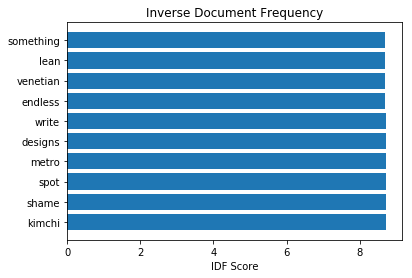

In [32]:
# Get the top 10 five star words with the highest IDF score
five_inds = np.argsort(tfidf.idf_)[::-1][20:30]
five_top_IDF_tokens = [list(tfidf.vocabulary_)[words] for words in five_inds]
five_top_IDF_scores = tfidf.idf_[five_inds]

# Get the words with the highest IDF score
plt.barh(five_top_IDF_tokens, five_top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [33]:
# Get the top 10 five star words with the highest IDF score
five_inds = np.argsort(tfidf.idf_)[::-1][30:40]
five_top_IDF_tokens = [list(tfidf.vocabulary_)[words] for words in five_inds]
five_top_IDF_scores = tfidf.idf_[five_inds]

# Get the words with the highest IDF score
plt.barh(five_top_IDF_tokens, five_top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [34]:
# Get the top 10 five star words with the highest IDF score
five_inds = np.argsort(tfidf.idf_)[::-1][40:50]
five_top_IDF_tokens = [list(tfidf.vocabulary_)[words] for words in five_inds]
five_top_IDF_scores = tfidf.idf_[five_inds]

# Get the words with the highest IDF score
plt.barh(five_top_IDF_tokens, five_top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');